# Projeto 2

### Análise exploratória de Dados em Linguagem Python para área de Varejo

In [2]:
# Importanções
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

/home/allvjr/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/allvjr/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Carregando os dados

In [4]:
df = pd.read_csv('dataset.csv')
#df = pd.read_excel('Sample_Superstore.xls')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

### Análise Exploratória

In [ ]:
# Colunas do conjunto de dados
df.columns

In [ ]:
# Verificando o tipo de dados de cada coluna
df.dtypes

In [22]:
# Resumo estatŕistico da coluna com o valor de Venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [23]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [24]:
# Verificando se ha valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [25]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


# Pergunta 1
### Qual cidade com maior valor de Venda de Produtos da Categoria "Office Supplies"?

In [59]:
filtro = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()

In [62]:
filtro

'New York City'

# Pergunta 2

Qual o total de vendas por Data do Pedido

In [46]:
total_pedido = df.groupby('Data_Pedido')['Valor_Venda'].sum()
total_pedido.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

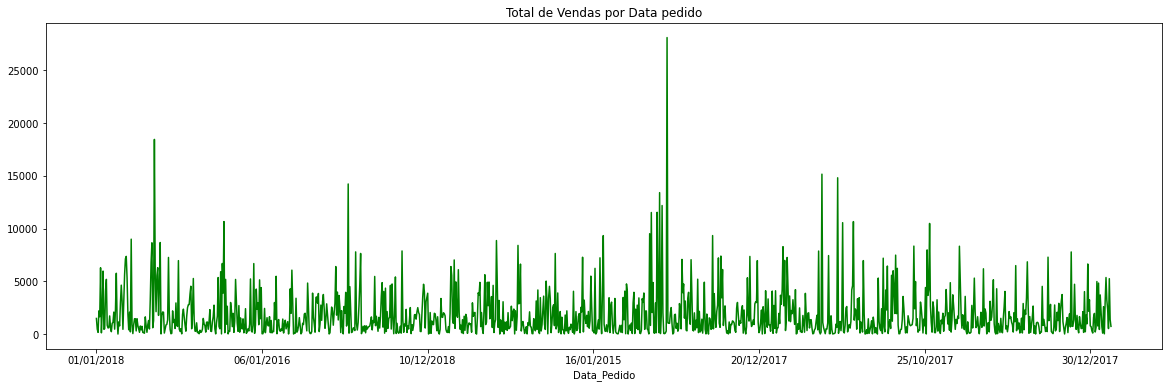

In [28]:
#plotando
plt.figure(figsize = (20, 6))
total_pedido.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por Data pedido')
plt.show()

# Pergunta 3
Qual o total de vendas por estado

In [22]:
total_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
total_estado.head()


,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


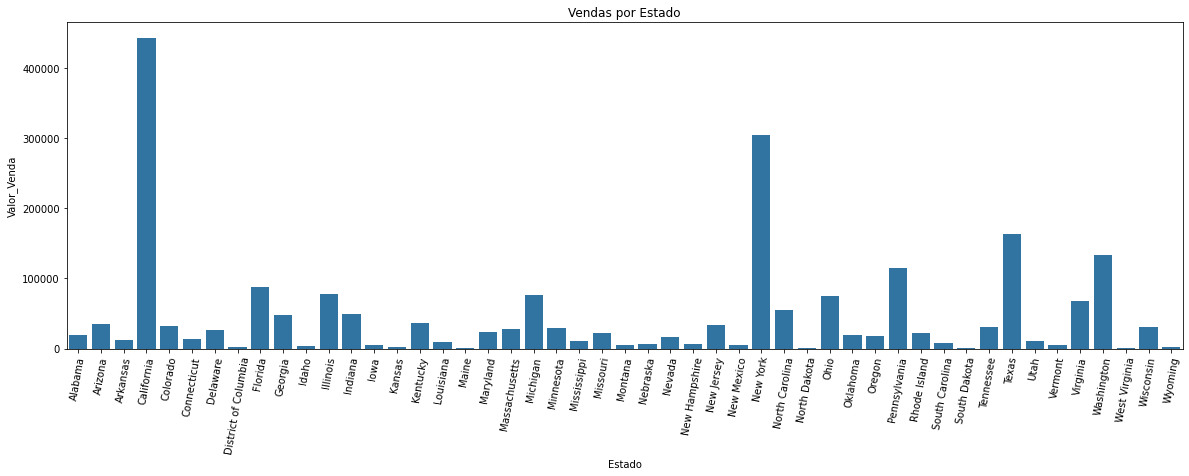

In [35]:
plt.figure(figsize=(20, 6))
sns.barplot(data = total_estado, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')

plt.xticks(rotation = 80)
plt.show()

## Pergunta 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [38]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [43]:
# Agrupamos por cidade, calcujlamos o total de vendas e ordenamos listando somente os 10 primeiros registros
maior_total = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False).head(10)

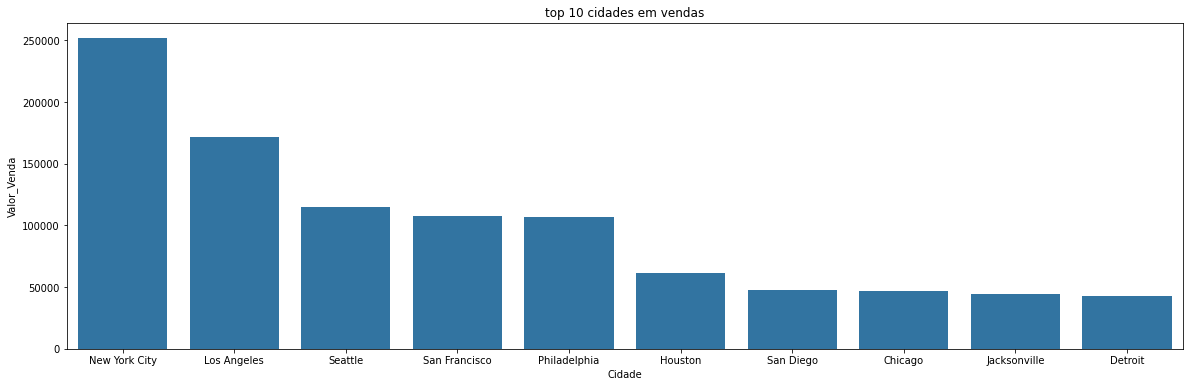

In [44]:
plt.figure(figsize=(20,6))
sns.barplot(data=maior_total, x = 'Cidade', y = 'Valor_Venda').set(title = 'top 10 cidades em vendas')
plt.xticks = 80
plt.show()

## Pergunta de 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [58]:
total_segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False)
total_segmento.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [66]:
# Função para converter os dados em valor absoluto
def autopct_format(value):
    def my_format(pct):
        total = sum(value)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

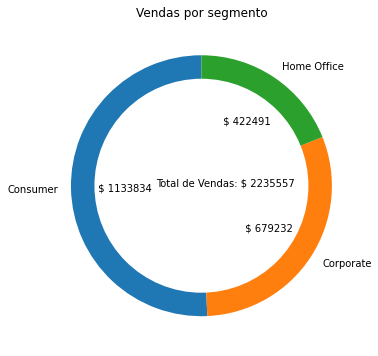

In [77]:
plt.figure(figsize=(16, 6))
plt.pie(total_segmento['Valor_Venda'], 
        labels=total_segmento['Segmento'], 
        autopct=autopct_format(total_segmento['Valor_Venda']), startangle=90)

# Limpa Circulo central
ciculo_central = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(ciculo_central)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(total_segmento['Valor_Venda']))), xy = (-0.35 , 0))
plt.title('Vendas por segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [80]:
# Convertemosm a coluna de dados para o time datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst= True)
df.dtypes
df.head()
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [88]:
segmento_ano = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
segmento_ano

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [89]:
# kcria uma nova coluna de acordo com a regra definica acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [90]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [91]:
# Total por cada valor da variável
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64